In [1]:
import sys,os,glob
import ROOT
# from array import array
# import uproot

Welcome to JupyROOT 6.16/00


In [2]:
import pickle
with open ('event_mva_dump_small_train', 'rb') as fp:
    pickled_list = pickle.load(fp)

In [4]:
bdt_sig = ROOT.TH1F("bdt_sig","BDT Signal",100,-1,1)
bdt_bkg = ROOT.TH1F("bdt_bkg","BDT Background",100,-1,1)

In [5]:
dnn_sig = ROOT.TH1F("dnn_sig","DNN Signal",100,0,1)
dnn_bkg = ROOT.TH1F("dnn_bkg","DNN Background",100,0,1)

In [6]:
for dnnScore, bdtScore, label, w, hmass in pickled_list:
    if label < 0:
        bdt_sig.Fill(bdtScore,w)
        dnn_sig.Fill(dnnScore,w)
    elif label > 0:
        bdt_bkg.Fill(bdtScore,w)
        dnn_bkg.Fill(dnnScore,w)

In [7]:
lumi = 41860
bdt_sig.Scale(lumi)
bdt_bkg.Scale(lumi)
dnn_sig.Scale(lumi)
dnn_bkg.Scale(lumi)

In [10]:
import rootnotes
c1 = rootnotes.canvas()

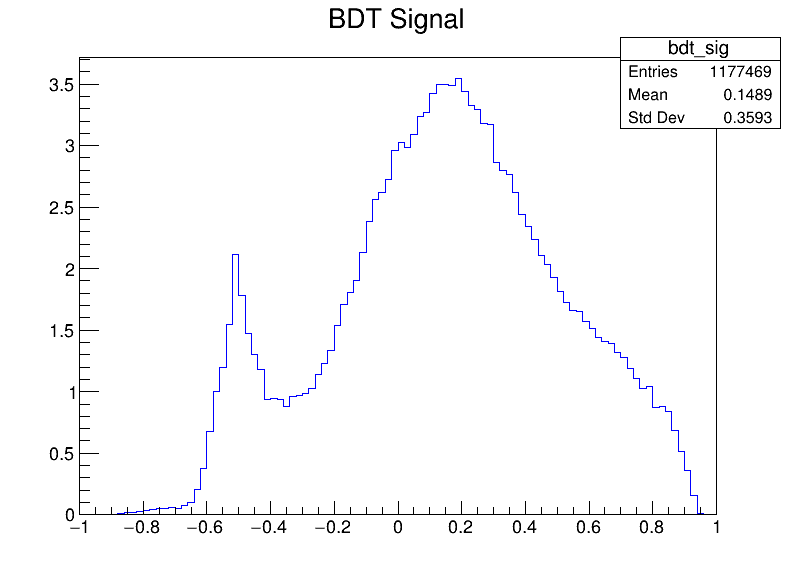

ERROR in TPDF::Open: Cannot open file:mva_plots/bdt_sig.pdf


Info in <TCanvas::Print>: png file /tmp/tmpc84x7ch0.png has been created


In [11]:
bdt_sig.SetLineColor(ROOT.kBlue)
bdt_sig.Draw("hist")
c1.SaveAs("mva_plots/bdt_sig.pdf")
c1

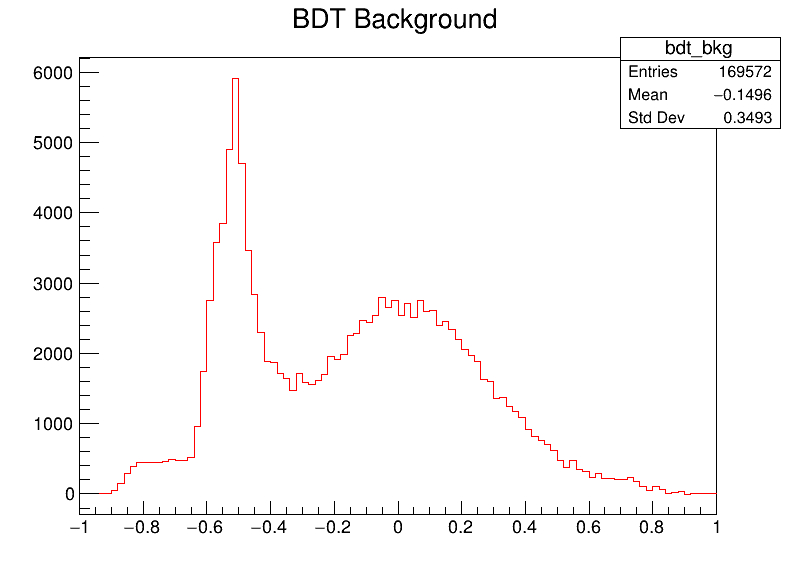

ERROR in TPDF::Open: Cannot open file:mva_plots/bdt_bkg.pdf


Info in <TCanvas::Print>: png file /tmp/tmppriuc_12.png has been created


In [12]:
bdt_bkg.SetLineColor(ROOT.kRed)
bdt_bkg.Draw("hist")
c1.SaveAs("mva_plots/bdt_bkg.pdf")
c1

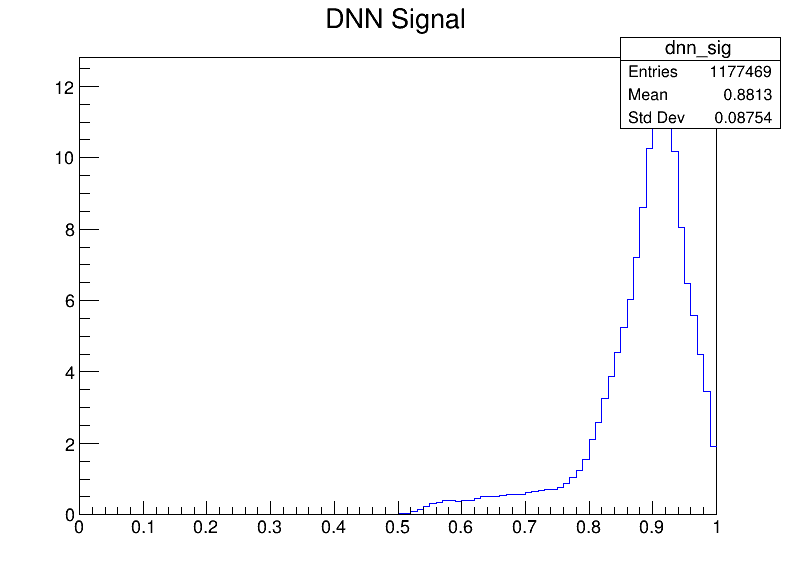

ERROR in TPDF::Open: Cannot open file:mva_plots/dnn_sig.pdf


Info in <TCanvas::Print>: png file /tmp/tmpdid4o06x.png has been created


In [13]:
dnn_sig.SetLineColor(ROOT.kBlue)
dnn_sig.Draw("hist")
c1.SaveAs("mva_plots/dnn_sig.pdf")
c1

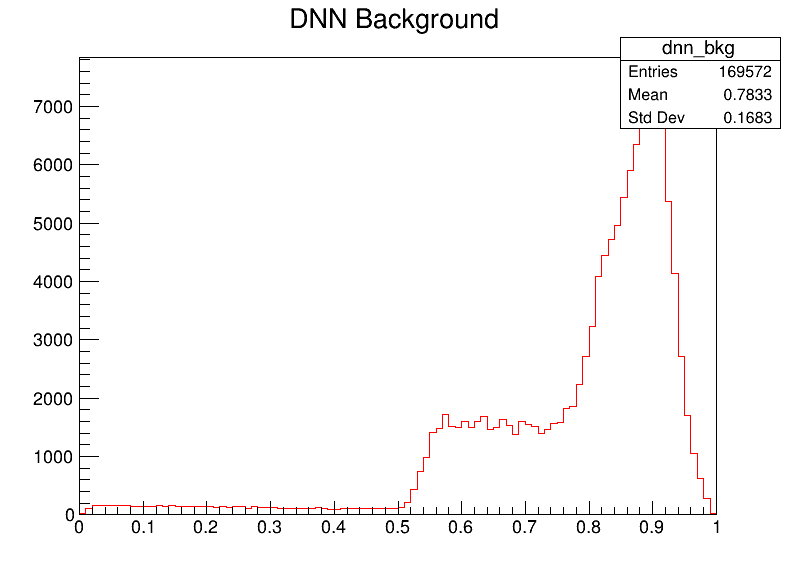

ERROR in TPDF::Open: Cannot open file:mva_plots/dnn_bkg.pdf


Info in <TCanvas::Print>: png file /tmp/tmphf7tn913.png has been created


In [14]:
dnn_bkg.SetLineColor(ROOT.kRed)
dnn_bkg.Draw("hist")
c1.SaveAs("mva_plots/dnn_bkg.pdf")
c1

In [14]:
%%cpp
Int_t nqs = 8;
Double_t xqs [8] = {0.1,0.25,0.5,0.6,0.7,0.8,0.9,0.95};  
Double_t yqs[8];
bdt_sig->GetQuantiles(nqs,yqs,xqs);
yqs

(Double_t [8]) { -0.33615835, -0.086902896, 0.15774372, 0.25520220, 0.35696821, 0.48422199, 0.62526760, 0.71765424 }


In [15]:
%%cpp
yqs

(Double_t [8]) { -0.33615835, -0.086902896, 0.15774372, 0.25520220, 0.35696821, 0.48422199, 0.62526760, 0.71765424 }


In [16]:
pyqs = [-.34,-.09,.16,.26,.36,.48,.63,.72]
binpyqs = [bdt_sig.GetXaxis().FindBin(i) for i in pyqs]
binpyqs = binpyqs
binpyqs

[33, 46, 58, 64, 69, 75, 82, 87]

In [17]:
sigInt = bdt_sig.Integral()
j = 0
for i in range(len(binpyqs)):
    j = bdt_sig.Integral(0,binpyqs[i])
    print(j/sigInt)

0.09860032000368138
0.2560042802288135
0.502333277184087
0.625817148792173
0.72034072853398
0.8112846756983819
0.9093106533657686
0.960178390087271


In [18]:
bdt_bkg_dimu_1 = ROOT.TH1F("bdt_bkg_dimu_1","-1.00 < BDT < -0.34",50,100,150)
bdt_bkg_dimu_2 = ROOT.TH1F("bdt_bkg_dimu_2","-0.34 < BDT < -.09",50,100,150)
bdt_bkg_dimu_3 = ROOT.TH1F("bdt_bkg_dimu_3","-0.09 < BDT < 0.16",50,100,150)
bdt_bkg_dimu_4 = ROOT.TH1F("bdt_bkg_dimu_4","0.16 < BDT < 0.26",50,100,150)
bdt_bkg_dimu_5 = ROOT.TH1F("bdt_bkg_dimu_5","0.26 < BDT < 0.36",50,100,150)
bdt_bkg_dimu_6 = ROOT.TH1F("bdt_bkg_dimu_6","0.36 < BDT < 0.48",50,100,150)
bdt_bkg_dimu_7 = ROOT.TH1F("bdt_bkg_dimu_7","0.48 < BDT < 0.63",50,100,150)
bdt_bkg_dimu_8 = ROOT.TH1F("bdt_bkg_dimu_8","0.63 < BDT < 0.72",50,100,150)
bdt_bkg_dimu_9 = ROOT.TH1F("bdt_bkg_dimu_9","0.72 < BDT < 1.00",50,100,150)


In [19]:
bdt_bkg_dims=[bdt_bkg_dimu_1,bdt_bkg_dimu_2,bdt_bkg_dimu_3,bdt_bkg_dimu_4,bdt_bkg_dimu_5,bdt_bkg_dimu_6,bdt_bkg_dimu_7,bdt_bkg_dimu_8,bdt_bkg_dimu_9]

In [26]:
for _, bdtScore, label, w, hmass in pickled_list:
    if label > 0:
        if bdtScore < -.34:
            bdt_bkg_dimu_1.Fill(hmass)
        elif bdtScore < -.09:
            bdt_bkg_dimu_2.Fill(hmass)
        elif bdtScore < .16:
            bdt_bkg_dimu_3.Fill(hmass)
        elif bdtScore < .26:
            bdt_bkg_dimu_4.Fill(hmass)
        elif bdtScore < .36:
            bdt_bkg_dimu_5.Fill(hmass)
        elif bdtScore < .48:
            bdt_bkg_dimu_6.Fill(hmass)
        elif bdtScore < .63:
            bdt_bkg_dimu_7.Fill(hmass)
        elif bdtScore < .72:
            bdt_bkg_dimu_8.Fill(hmass)
        else:
            bdt_bkg_dimu_9.Fill(hmass)

In [21]:
%%cpp
Int_t dnqs = 8;
Double_t dxqs [8] = {0.1,0.25,0.5,0.6,0.7,0.8,0.9,0.95};  
Double_t dyqs[8];
dnn_sig->GetQuantiles(dnqs,dyqs,dxqs);
dyqs

(Double_t [8]) { 0.47717762, 0.63766218, 0.73964114, 0.77211722, 0.80501489, 0.84085994, 0.89126951, 0.92680179 }


In [22]:
dnn_bkg_dimu_1 = ROOT.TH1F("dnn_bkg_dimu_1","0.00 < DNN < 0.48",50,100,150)
dnn_bkg_dimu_2 = ROOT.TH1F("dnn_bkg_dimu_2","0.48 < DNN < 0.64",50,100,150)
dnn_bkg_dimu_3 = ROOT.TH1F("dnn_bkg_dimu_3","0.64 < DNN < 0.74",50,100,150)
dnn_bkg_dimu_4 = ROOT.TH1F("dnn_bkg_dimu_4","0.74 < DNN < 0.77",50,100,150)
dnn_bkg_dimu_5 = ROOT.TH1F("dnn_bkg_dimu_5","0.77 < DNN < 0.81",50,100,150)
dnn_bkg_dimu_6 = ROOT.TH1F("dnn_bkg_dimu_6","0.81 < DNN < 0.84",50,100,150)
dnn_bkg_dimu_7 = ROOT.TH1F("dnn_bkg_dimu_7","0.84 < DNN < 0.89",50,100,150)
dnn_bkg_dimu_8 = ROOT.TH1F("dnn_bkg_dimu_8","0.89 < DNN < 0.93",50,100,150)
dnn_bkg_dimu_9 = ROOT.TH1F("dnn_bkg_dimu_9","0.93  < DNN < 1.00",50,100,150)
dnn_bkg_dims=[dnn_bkg_dimu_1,dnn_bkg_dimu_2,dnn_bkg_dimu_3,dnn_bkg_dimu_4,dnn_bkg_dimu_5,dnn_bkg_dimu_6,dnn_bkg_dimu_7,dnn_bkg_dimu_8,dnn_bkg_dimu_9]

In [27]:
for dnnScore, _, label, w, hmass in pickled_list:
    if label > 0:
        if dnnScore < .48:
            dnn_bkg_dimu_1.Fill(hmass)
        elif dnnScore < .64:
            dnn_bkg_dimu_2.Fill(hmass)
        elif dnnScore < .74:
            dnn_bkg_dimu_3.Fill(hmass)
        elif dnnScore < .77:
            dnn_bkg_dimu_4.Fill(hmass)
        elif dnnScore < .81:
            dnn_bkg_dimu_5.Fill(hmass)
        elif dnnScore < .84:
            dnn_bkg_dimu_6.Fill(hmass)
        elif dnnScore < .89:
            dnn_bkg_dimu_7.Fill(hmass)
        elif dnnScore < .93:
            dnn_bkg_dimu_8.Fill(hmass)
        else:
            dnn_bkg_dimu_9.Fill(hmass)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: pdf file mva_plots/bdt_bkg_mass.pdf has been created


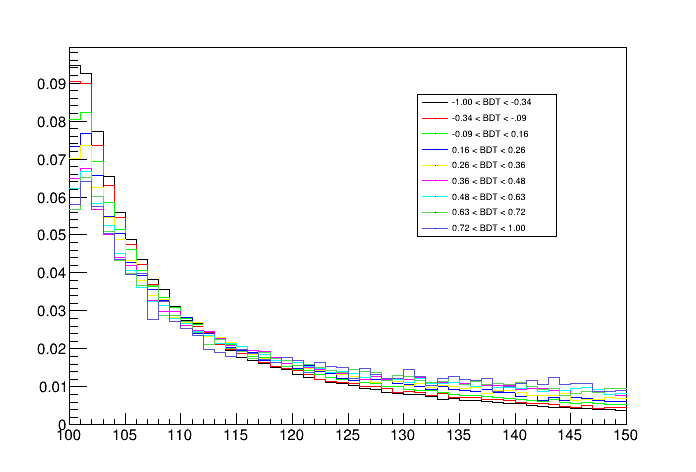

In [28]:
c2 = ROOT.TCanvas("c2")
leg = ROOT.TLegend(0.6, 0.5, .8, .8)
i=1
for plot in bdt_bkg_dims:
    plot.SetStats(ROOT.kFALSE)
#     print(plot.Integral())
    plot.Scale(1/plot.Integral())
    plot.SetLineColor(i)
    plot.Draw("hist same")
    leg.AddEntry(plot,plot.GetTitle())
    plot.SetTitle("")
    i+=1
leg.Draw()
c2.Draw()
c2.SaveAs("mva_plots/bdt_bkg_mass.pdf")

Info in <TCanvas::Print>: pdf file mva_plots/dnn_bkg_mass.pdf has been created


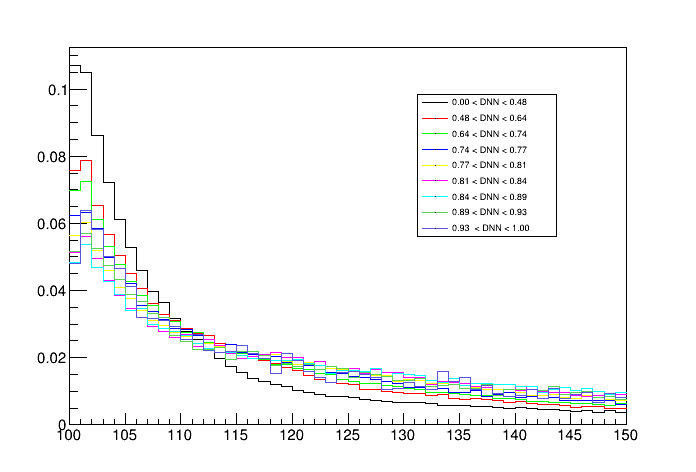

In [29]:
c3 = ROOT.TCanvas("c3")
leg = ROOT.TLegend(0.6, 0.5, .8, .8)
i=1
for plot in dnn_bkg_dims:
    plot.SetStats(ROOT.kFALSE)
    plot.Scale(1/plot.Integral())
    plot.SetLineColor(i)
    plot.Draw("hist same")
    leg.AddEntry(plot,plot.GetTitle())
    plot.SetTitle("")
    i+=1
leg.Draw()
c3.Draw()
c3.SaveAs("mva_plots/dnn_bkg_mass.pdf")

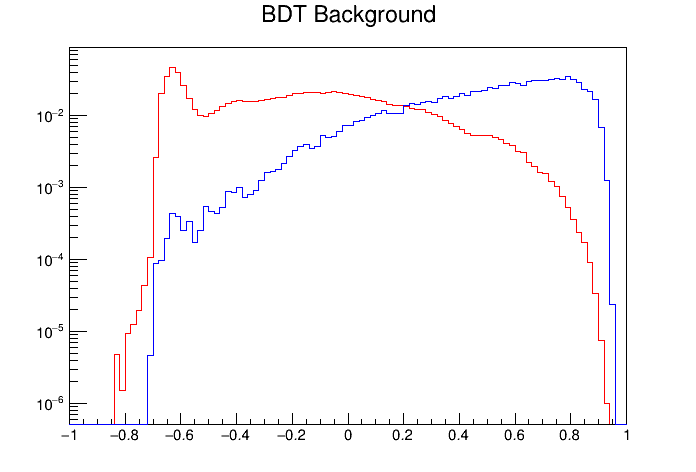

In [12]:
c4 = ROOT.TCanvas("c4")
bdt_bkg.Scale(1/bdt_bkg.Integral())
# bdt_bkg.SetLineColor(ROOT.kRed)
# bdt_bkg.SetMinimum(.001)
# bdt_bkg.SetFillStyle(0)
bdt_bkg.SetStats(ROOT.kFALSE)
bdt_bkg.Draw("hist")

bdt_sig.Scale(1/bdt_sig.Integral())
# bdt_sig.SetLineColor(ROOT.kBlue)
bdt_sig.Draw("hist same")
c4.SetLogy()
c4.Draw()

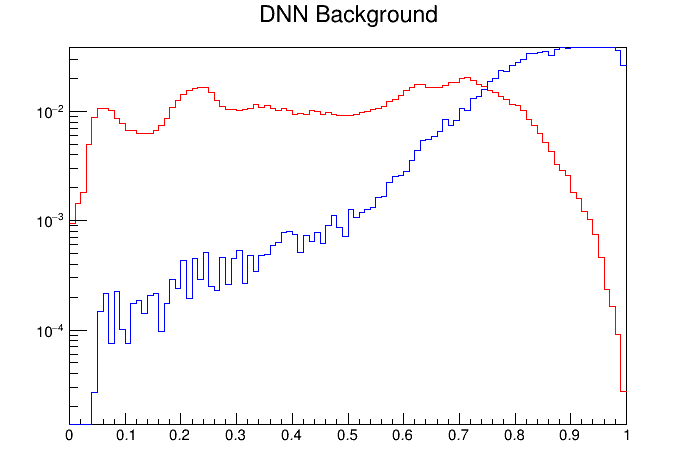

In [13]:
c5 = ROOT.TCanvas("c5")
dnn_bkg.Scale(1/dnn_bkg.Integral())
# dnn_bkg.SetLineColor(R.kRed)
# dnn_bkg.SetMinimum(.001)
# dnn_bkg.SetFillStyle(0)
dnn_bkg.SetStats(ROOT.kFALSE)
dnn_bkg.Draw("hist")

dnn_sig.Scale(1/dnn_sig.Integral())
# dnn_sig.SetLineColor(R.kBlue)
dnn_sig.Draw("hist same")
c5.SetLogy()
c5.Draw()

In [3]:
dnn_scores = ROOT.std.vector('Float_t')()
bdt_scores = ROOT.std.vector('Float_t')()
classes = ROOT.std.vector('Bool_t')()
weight = ROOT.std.vector('Float_t')()

In [4]:
for dnnScore, bdtScore, label, w, _ in pickled_list:
    if label > 0:
        dnn_scores.push_back(dnnScore)
        bdt_scores.push_back(bdtScore)
        classes.push_back(0)
        weight.push_back(w)
    if label < 0:
        dnn_scores.push_back(dnnScore)
        bdt_scores.push_back(bdtScore)
        classes.push_back(1)
        weight.push_back(w)

In [5]:
bdt_rc = ROOT.TMVA.ROCCurve(bdt_scores,classes,weight)
dnn_rc = ROOT.TMVA.ROCCurve(dnn_scores,classes,weight)

In [6]:
dnn_roc = dnn_rc.GetROCCurve()
bdt_roc = bdt_rc.GetROCCurve()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
python ERROR: cannot open image file "mva_plots/bdt_dnn_ggh_ROC.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file mva_plots/bdt_dnn_ggh_ROC.png


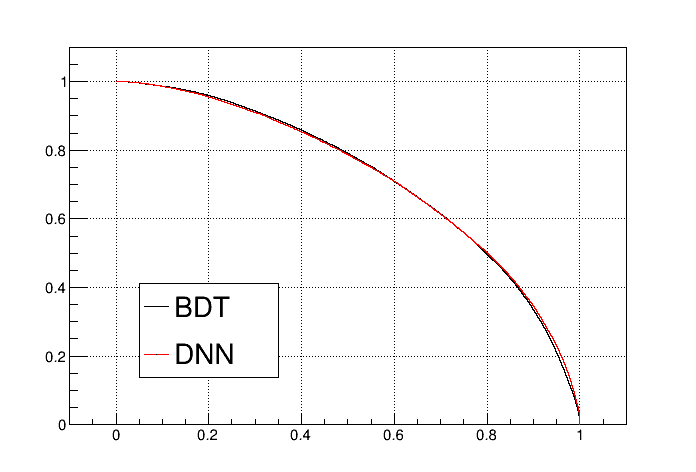

In [8]:
c6 = ROOT.TCanvas("c6","c6")
c6.SetGrid()
leg = ROOT.TLegend(0.2, 0.2, .4, .4)

bdt_roc.SetTitle("")
bdt_roc.SetLineColor(ROOT.kBlack)
leg.AddEntry(bdt_roc,"BDT")
bdt_roc.Draw()

dnn_roc.SetTitle("")
dnn_roc.SetLineColor(ROOT.kRed)
leg.AddEntry(dnn_roc,"DNN")
dnn_roc.Draw("same")
leg.Draw()

c6.Draw()
c6.SaveAs("mva_plots/bdt_dnn_ggh_ROC.png")

In [9]:
bdt_rc2 = ROOT.TMVA.ROCCurve(bdt_scores,classes)
dnn_rc2 = ROOT.TMVA.ROCCurve(dnn_scores,classes)

In [10]:
dnn_roc2 = dnn_rc2.GetROCCurve()
bdt_roc2 = bdt_rc2.GetROCCurve()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
python ERROR: cannot open image file "mva_plots/bdt_dnn_roc2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file mva_plots/bdt_dnn_roc2.png


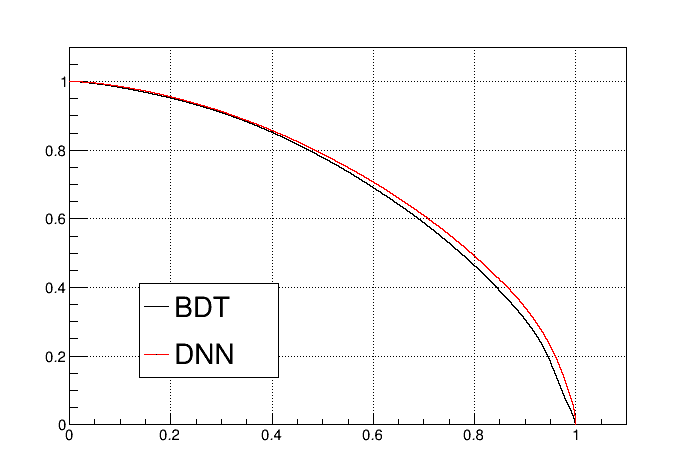

In [11]:
c6 = ROOT.TCanvas("c6","c6")
c6.SetGrid()
leg = ROOT.TLegend(0.2, 0.2, .4, .4)

bdt_roc2.SetTitle("")
bdt_roc2.SetLineColor(ROOT.kBlack)
leg.AddEntry(bdt_roc2,"BDT")
bdt_roc2.Draw()

dnn_roc2.SetTitle("")
dnn_roc2.SetLineColor(ROOT.kRed)
leg.AddEntry(dnn_roc2,"DNN")
dnn_roc2.Draw("same")
leg.Draw()

c6.Draw()
c6.SaveAs("mva_plots/bdt_dnn_roc2.png")